In [ ]:
import numpy as np
from PIL import Image
import zipfile
with zipfile.ZipFile('/content/Data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
#getting X telda
TrainPath = "/content/Data/Train/"
X = np.ones([2400, 785 ])
label = np.genfromtxt("/content/Training Labels.txt", delimiter = ",")
for i in range(2400):
    newpath = TrainPath + str(i+1) + ".jpg"
    image = np.append(np.asarray(Image.open(newpath)).flatten(),[1])
    X[i] =  image

In [ ]:
def getT(number):
    T = np.ones([2400])
    T *= -1
    start =  number*240
    for i in range (240):
        T[start+i] *=-1
    return T
getT(0)

array([ 1.,  1.,  1., ..., -1., -1., -1.])

In [ ]:
Function =  np.linalg.pinv(X.transpose().dot(X)).dot(X.transpose())
resultLabels = np.ones([200])
for i in range(200):
  newpath = "/content/Data/Test/" + str(i+1) + ".jpg"
  image = np.append(np.asarray(Image.open(newpath)).flatten(), [1])
  Weights = np.zeros([10])
  for j in range(10):
        Windex = Function.dot(getT(j)); #getting the weight
        Weights[j] = image.dot(Windex)
  max= np.amax(Weights)
  index = np.where(Weights == max)
  resultLabels[i] = index[0][0]

In [ ]:

PathTestLabel=np.genfromtxt("/content/Test Labels.txt", delimiter = ",")
Matrix = np.zeros([10, 10])
for i in range(len(PathTestLabel)):
    Matrix[int(PathTestLabel[i])][int(resultLabels[i])] += 1
    Matrix=Matrix.astype(int)
Matrix

array([[19,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  3, 11,  2,  2,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 17,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  1,  0, 14,  1,  0,  2,  2],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0, 15,  0,  3],
       [ 0,  0,  1,  0,  0,  3,  0,  0, 15,  1],
       [ 1,  0,  0,  1,  1,  1,  0,  4,  0, 12]])

<ipython-input-65-37d1943920b5>:24: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  plt.savefig("confusion.png", dpi=None, facecolor='w', edgecolor='w',


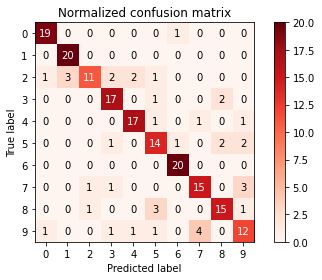

In [ ]:
import matplotlib.pyplot as plt
def plot_cm(y_true, y_pred, classes, Matrix, title=None):
    fig, ax = plt.subplots()
    im = ax.imshow(Matrix, interpolation='nearest', cmap=plt.cm.Reds)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(Matrix.shape[1]),
           yticks=np.arange(Matrix.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    thresh = Matrix.max() / 2.
    for i in range(Matrix.shape[0]):
        for j in range(Matrix.shape[1]):
            ax.text(j, i, format(Matrix[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if Matrix[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)
class_names = ["0","1","2","3","4","5","6","7","8","9"]
plot_cm(np.genfromtxt("/content/Test Labels.txt", delimiter = ","), resultLabels, classes=class_names, Matrix = Matrix,
                      title='Normalized confusion matrix')
plt.savefig("confusion.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
plt.show()